# Housekeeping

Nameing convention for crystals: c<clover#>c<crystal#>

Three clovers of 4 crystals each, so the names range from c0c0 to c2c3

# Setup Code

In [7]:
using Plots, DelimitedFiles,LsqFit #PlotlyBase,PlotlyKaleido,PlotlyJS
#plotly()

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

euliterature=[121.78,
                  344.2785,
                  1408,
                  964.079,
                  1112.074,
                  778.9040,
                  1085.869,
                  244.6975,
                  867.378,
                  443.965,
                  411.1163,
                  1089.737,
                  1299.140,
                  1212.948]

14-element Vector{Float64}:
  121.78
  344.2785
 1408.0
  964.079
 1112.074
  778.904
 1085.869
  244.6975
  867.378
  443.965
  411.1163
 1089.737
 1299.14
 1212.948

# 152Eu Check Source

The calibration source was RP5139, running for 1633 seconds.

The source activity was 4.47e4 Bq in 4/2/2024, so we can calculate the activity during the experiment run in 4/30/2024.

<img src="images/152Eu-new-source-label.jpg" alt="Drawing" style="width: 300px;"/>

In [8]:
activitycalibration=4.47e4
secondssincecalibration=28*24*3600
T₁₂=13.517*365*24*3600
halflives=secondssincecalibration/T₁₂
activityexperiment=activitycalibration/2^halflives
println("Activity (Bq) =  $activityexperiment")

Activity (Bq) =  44524.50533952962


# Import K47 Calibration Data

In [227]:
numcrystals = 10
# Open XML containing K47 calibration data as readonly
io = open("calibrations/K47-calibration.xml", "r")
# Read in XML line by line
lines = readlines(io)

K47_calibrations = []

for i in range(0,numcrystals-1,step=1)
    #Only save lines that contain fit parameters, separate values by tab delimiter
    substring = split(lines[3+i*6], "     ")
    #broadcast converstion of the parameters from strings into Floats
    params = parse.(Float64, substring)
    #append these parameters to the calibrations vector
    push!(K47_calibrations, params)
end

In [228]:
#clover 0
fitc0c2,fitc0c3 = K47_calibrations[1],K47_calibrations[2]

#clover 1
fitc1c0,fitc1c1,fitc1c2,fitc1c3 = K47_calibrations[3],K47_calibrations[4],K47_calibrations[5],K47_calibrations[6]

#clover 2
fitc2c0,fitc2c1,fitc2c2,fitc2c3 = K47_calibrations[7],K47_calibrations[8],K47_calibrations[9],K47_calibrations[10]

([3.392054519341509, 0.18073073224682093], [2.5779234089275143, 0.1774298350495903], [2.8930892995320017, 0.1821131786866249], [5.115504881415563, 0.17949585087644462])

# Clover 0

## Crystal 2 (c0c2)

In [124]:
euc0c2=readdlm("data/c0c2.txt",comments=true,comment_char='#')

16384×3 Matrix{Float64}:
     0.5  34017.0  184.437
     1.5   2326.0   48.2286
     2.5   2425.0   49.2443
     3.5   2300.0   47.9583
     4.5   1799.0   42.4146
     5.5   1416.0   37.6298
     6.5    974.0   31.209
     7.5    651.0   25.5147
     8.5    355.0   18.8414
     9.5    204.0   14.2829
    10.5    102.0   10.0995
    11.5     58.0    7.61577
    12.5     38.0    6.16441
     ⋮             
 16372.5      0.0    0.0
 16373.5      0.0    0.0
 16374.5      0.0    0.0
 16375.5      0.0    0.0
 16376.5      0.0    0.0
 16377.5      0.0    0.0
 16378.5      0.0    0.0
 16379.5      0.0    0.0
 16380.5      0.0    0.0
 16381.5      0.0    0.0
 16382.5      0.0    0.0
 16383.5      0.0    0.0

┌ Warning: Skipped yaxis arg lin
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/axes.jl:76


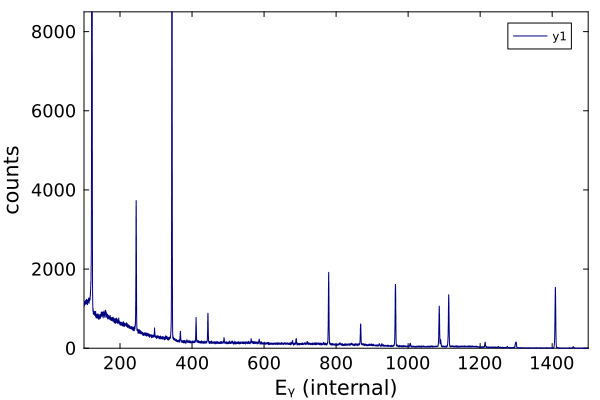

In [135]:
xlow,xhigh=100,1500; ylow,yhigh=0,8500
plot(euc0c2[:,1].*fitc0c2[2].+fitc0c2[1],euc0c2[:,2],xlims=(xlow,xhigh),ylims=(ylow,yhigh),
seriestype=:stepmid,yaxis=:lin)
#vline!(euliterature,lc=:crimson)

In [163]:
sort(euliterature)

14-element Vector{Float64}:
  121.78
  244.6975
  344.2785
  411.1163
  443.965
  778.904
  867.378
  964.079
 1085.869
 1089.737
 1112.074
 1212.948
 1299.14
 1408.0

### Peaks

#### Peak 1 (122)

P1 = 4166.434058322906(349.75968508880885)
P2 = -24.937591226096675(2.847202845270912)
P3 = 29957.785884978104(203.9508338295309)
P4 = 122.01756973347473(0.004739330972957397)
P5 = 0.6494387406433335(0.004862053467965979)


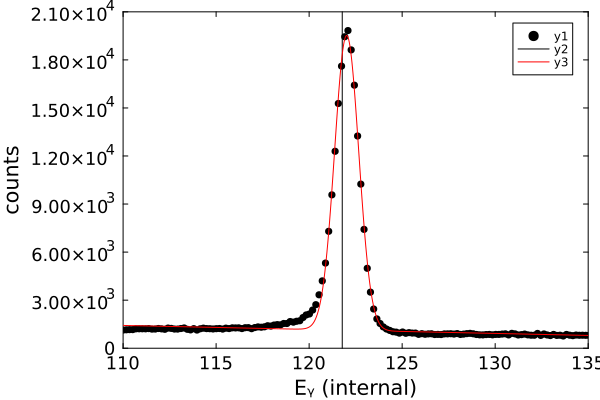

In [157]:
c0c2_x1low,c0c2_x1high=110,135; ylow,yhigh=0,21000
c0c2_p1_mean = 122
c0c2_param1=[0.1,0.000005,1000,c0c2_p1_mean,0.1]

euc0c2cal = [euc0c2[:,1].*fitc0c2[2].+fitc0c2[1] euc0c1[:,2]]

c0c2_p1,c0c2_s1,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p1)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p1),c0c2_x1low,c0c2_x1high,lc=:red)

#### Peak 2 (245)

P1 = 1594.4134671188733(51.89109055773227)
P2 = -4.621635472986282(0.2115692304934421)
P3 = 5506.529668562476(30.94240255871169)
P4 = 244.86483240097482(0.004226095762449835)
P5 = 0.6828616779888455(0.004294813448416014)


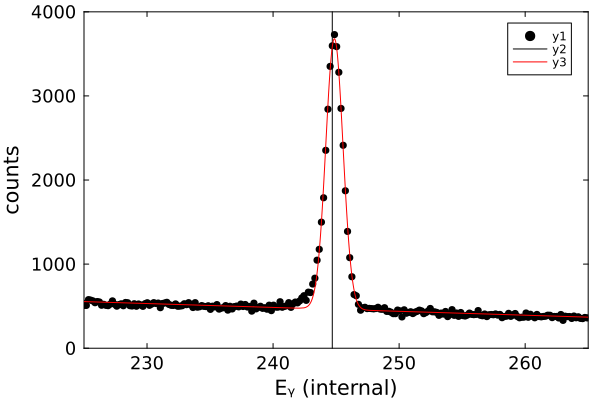

In [169]:
c0c2_p2_mean = sort(euliterature)[2]
c0c2_x2low,c0c2_x2high=225,265; ylow,yhigh=0,4000

c0c2_param2=[0.1,0.000005,1000,c0c2_p2_mean,0.1]

c0c2_p2,c0c2_s2,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x2low,c0c2_x2high,c0c2_param2)

for (i,val) in enumerate(c0c2_p2)
    println("P$i = ",val,"($(c0c2_s2[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x2low,c0c2_x2high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p2),c0c2_x2low,c0c2_x2high,lc=:red)

#### Peak 3 (344)

P1 = 1130.3885302836013(136.70274629531792)
P2 = -2.5760300566183654(0.39596649549582863)
P3 = 14740.205126810602(59.339172601206236)
P4 = 344.21491380467245(0.003156956711587754)
P5 = 0.7137699637919555(0.0032110045365764356)


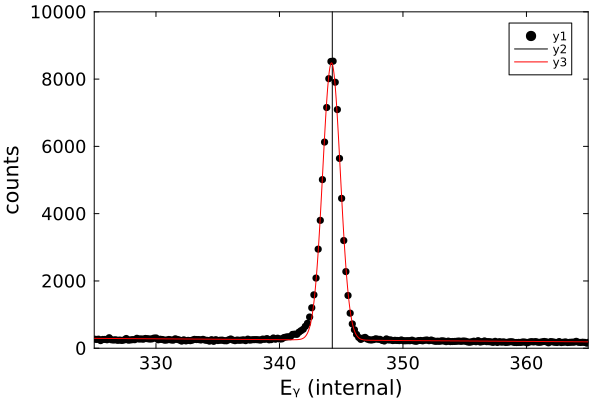

In [174]:
c0c2_p3_mean = sort(euliterature)[3]
c0c2_x3low,c0c2_x3high=325,365; ylow,yhigh=0,10000

c0c2_param3=[0.1,0.000005,1000,c0c2_p3_mean,0.1]

c0c2_p3,c0c2_s3,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x3low,c0c2_x3high,c0c2_param3)

for (i,val) in enumerate(c0c2_p3)
    println("P$i = ",val,"($(c0c2_s3[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x3low,c0c2_x3high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p3),c0c2_x3low,c0c2_x3high,lc=:red)

#### Peak 4 (411)

P1 = 231.907318539127(31.90814205347601)
P2 = -0.1822618762473592(0.07780480989023246)
P3 = 1036.4142900066167(11.783601623578974)
P4 = 411.25139196729646(0.009076006126223864)
P5 = 0.7275600189469467(0.009235775778012802)


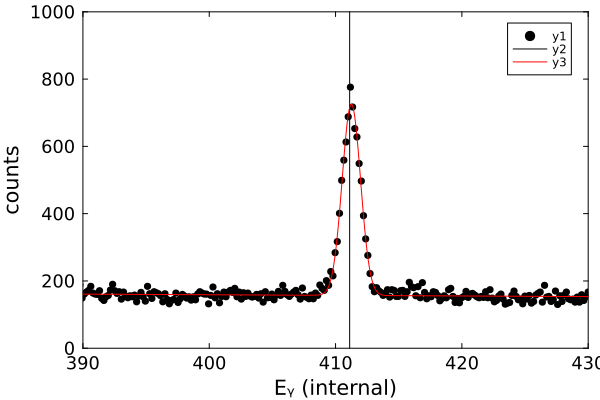

In [179]:
c0c2_p4_mean = sort(euliterature)[4]
c0c2_x4low,c0c2_x4high=390,430; ylow,yhigh=0,1000

c0c2_param4=[0.1,0.000005,1000,c0c2_p4_mean,0.1]

c0c2_p4,c0c2_s4,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x4low,c0c2_x4high,c0c2_param4)

for (i,val) in enumerate(c0c2_p4)
    println("P$i = ",val,"($(c0c2_s4[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x4low,c0c2_x4high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p4),c0c2_x4low,c0c2_x4high,lc=:red)

#### Peak 5 (444)

P1 = 282.58687807621556(39.21753018657462)
P2 = -0.30564089854288007(0.08807214391905221)
P3 = 1366.9376014899817(13.586088833123103)
P4 = 444.136879975757(0.008274843734558978)
P5 = 0.7606311662334804(0.008427505096992161)


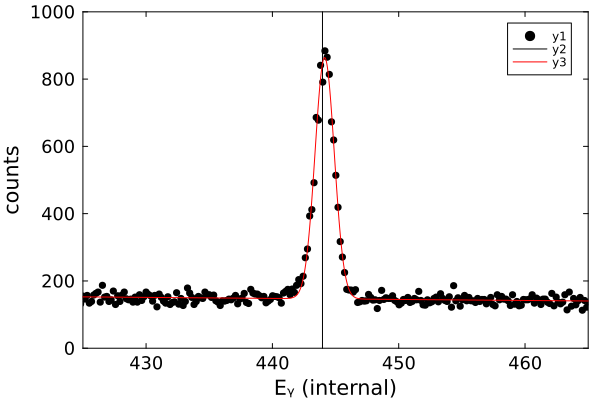

In [181]:
c0c2_p5_mean = sort(euliterature)[5]
c0c2_x5low,c0c2_x5high=425,465; ylow,yhigh=0,1000

c0c2_param5=[0.1,0.000005,1000,c0c2_p5_mean,0.1]

c0c2_p5,c0c2_s5,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x5low,c0c2_x5high,c0c2_param5)

for (i,val) in enumerate(c0c2_p5)
    println("P$i = ",val,"($(c0c2_s5[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x5low,c0c2_x5high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p5),c0c2_x5low,c0c2_x5high,lc=:red)

#### Peak 6 (779)

P1 = 527.6053864842(80.20512675813258)
P2 = -0.5424803023431145(0.10280969902627561)
P3 = 3619.452050775656(16.72315513459389)
P4 = 779.3561359200432(0.004164679988622833)
P5 = 0.8271717199748192(0.004248047614201506)


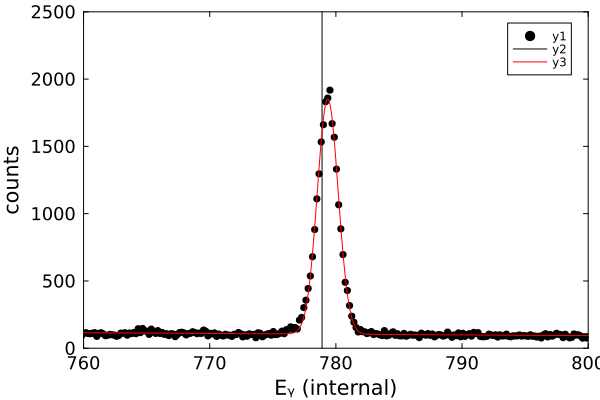

In [188]:
c0c2_p6_mean = sort(euliterature)[6]
c0c2_x6low,c0c2_x6high=760,800; ylow,yhigh=0,2500

c0c2_param6=[0.1,0.000005,1000,c0c2_p6_mean,0.1]

c0c2_p6,c0c2_s6,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x6low,c0c2_x6high,c0c2_param6)

for (i,val) in enumerate(c0c2_p6)
    println("P$i = ",val,"($(c0c2_s6[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x6low,c0c2_x6high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p6),c0c2_x6low,c0c2_x6high,lc=:red)

#### Peak 7 (867)

P1 = 314.23351182480553(31.643076836107227)
P2 = -0.25709427502540755(0.03635617137740569)
P3 = 1132.8634241200973(10.869334058091853)
P4 = 868.1355280409074(0.009211146448427318)
P5 = 0.865622286982765(0.009338340070151958)


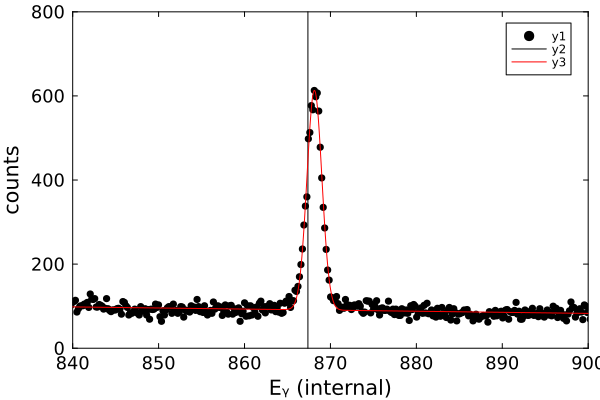

In [191]:
c0c2_p7_mean = sort(euliterature)[7]
c0c2_x7low,c0c2_x7high=840,900; ylow,yhigh=0,800

c0c2_param7=[0.1,0.000005,1000,c0c2_p7_mean,0.1]

c0c2_p7,c0c2_s7,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x7low,c0c2_x7high,c0c2_param7)

for (i,val) in enumerate(c0c2_p7)
    println("P$i = ",val,"($(c0c2_s7[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x7low,c0c2_x7high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p7),c0c2_x7low,c0c2_x7high,lc=:red)

#### Peak 8 (964)

P1 = 337.1316820940257(62.6407921524583)
P2 = -0.2913046744968996(0.06490315745424624)
P3 = 3549.112515187719(15.17169058973574)
P4 = 964.7932538792487(0.0042143873177247675)
P5 = 0.897574507038857(0.004286927422542978)


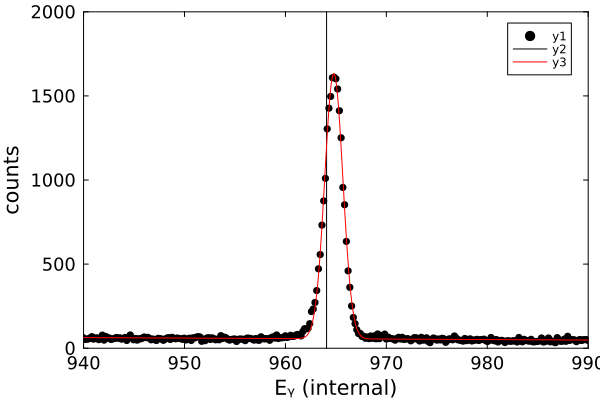

In [196]:
c0c2_p8_mean = sort(euliterature)[8]
c0c2_x8low,c0c2_x8high=940,990; ylow,yhigh=0,2000

c0c2_param8=[0.1,0.000005,1000,c0c2_p8_mean,0.1]

c0c2_p8,c0c2_s8,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x8low,c0c2_x8high,c0c2_param8)

for (i,val) in enumerate(c0c2_p8)
    println("P$i = ",val,"($(c0c2_s8[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x8low,c0c2_x8high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p8),c0c2_x8low,c0c2_x8high,lc=:red)

#### Peak 9 (1086)

P1 = -7165.140760065977(1696.2604498235537)
P2 = 6.6740798288119105(1.5664018662824377)
P3 = 2158.5761288754456(40.019884223094685)
P4 = 1086.419061283387(0.010976991635971227)
P5 = 0.9147232158641498(0.013996704487576084)


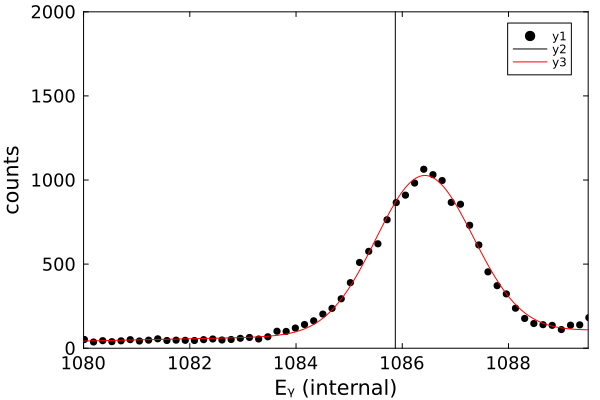

In [204]:
c0c2_p9_mean = sort(euliterature)[9]
c0c2_x9low,c0c2_x9high=1080,1089.5; ylow,yhigh=0,2000

c0c2_param9=[0.1,0.000005,1000,c0c2_p9_mean,0.1]

c0c2_p9,c0c2_s9,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x9low,c0c2_x9high,c0c2_param9)

for (i,val) in enumerate(c0c2_p9)
    println("P$i = ",val,"($(c0c2_s9[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x9low,c0c2_x9high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p9),c0c2_x9low,c0c2_x9high,lc=:red)

#### Peak 10 (1090)

P1 = 620.7484427166756(876.4961711490258)
P2 = -0.5255608196144453(0.7993651028060754)
P3 = 422.75653349756857(27.975737297905344)
P4 = 1090.2213227079335(0.03153286667961919)
P5 = 1.0506805473024012(0.047486871589102454)


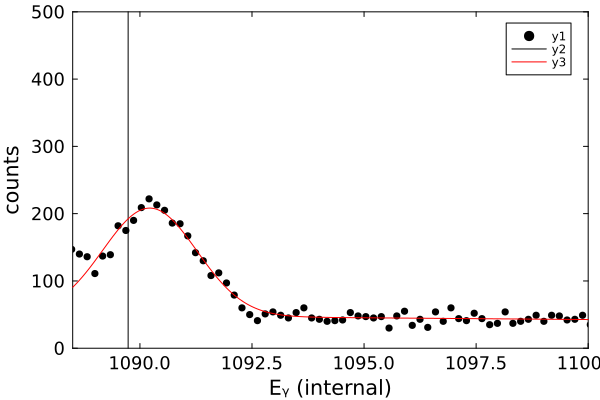

In [209]:
c0c2_p10_mean = sort(euliterature)[10]
c0c2_x10low,c0c2_x10high=1088.5,1100; ylow,yhigh=0,500

c0c2_param10=[0.1,0.000005,1000,c0c2_p10_mean,0.1]

c0c2_p10,c0c2_s10,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x10low,c0c2_x10high,c0c2_param10)

for (i,val) in enumerate(c0c2_p10)
    println("P$i = ",val,"($(c0c2_s10[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x10low,c0c2_x10high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p10),c0c2_x10low,c0c2_x10high,lc=:red)

#### Peak 11 (1112)

P1 = 16.993445330207788(260.2137663134999)
P2 = 0.028429267087187998(0.23377347690811281)
P3 = 2997.1002979188015(22.407186462352982)
P4 = 1112.7013327757747(0.007359530985699828)
P5 = 0.9473092411566812(0.007632394466708722)


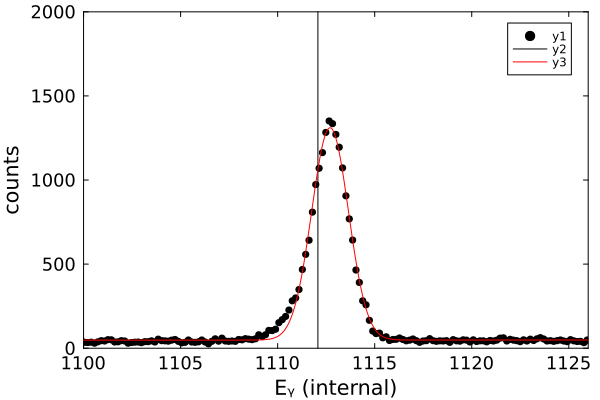

In [214]:
c0c2_p11_mean = sort(euliterature)[11]
c0c2_x11low,c0c2_x11high=1100,1126; ylow,yhigh=0,2000

c0c2_param11=[0.1,0.000005,1000,c0c2_p11_mean,0.1]

c0c2_p11,c0c2_s11,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x11low,c0c2_x11high,c0c2_param11)

for (i,val) in enumerate(c0c2_p11)
    println("P$i = ",val,"($(c0c2_s11[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x11low,c0c2_x11high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p11),c0c2_x11low,c0c2_x11high,lc=:red)

#### Peak 12 (1213)

P1 = 290.43420785329215(38.889759761564264)
P2 = -0.21761340344856867(0.032002167151717005)
P3 = 290.961085657951(5.757798342398622)
P4 = 1213.7493457787382(0.021044228539708953)
P5 = 0.9882255385288129(0.021559780213933247)


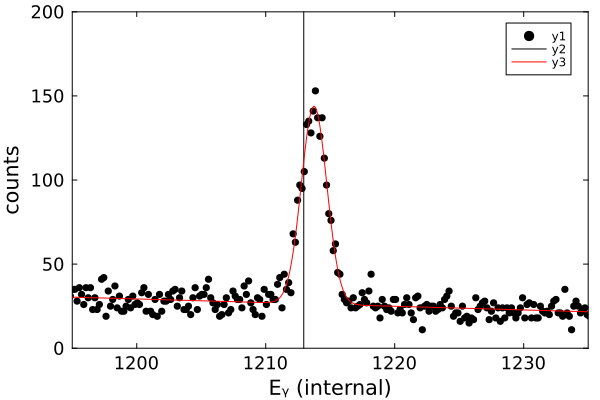

In [219]:
c0c2_p12_mean = sort(euliterature)[12]
c0c2_x12low,c0c2_x12high=1195,1235; ylow,yhigh=0,200

c0c2_param12=[0.1,0.000005,1000,c0c2_p12_mean,0.1]

c0c2_p12,c0c2_s12,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x12low,c0c2_x12high,c0c2_param12)

for (i,val) in enumerate(c0c2_p12)
    println("P$i = ",val,"($(c0c2_s12[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x12low,c0c2_x12high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p12),c0c2_x12low,c0c2_x12high,lc=:red)

#### Peak 13 (1299)

P1 = 314.306117404219(53.89488661113536)
P2 = -0.2339642260007928(0.04144745964943079)
P3 = 557.9951599464665(10.103395381975798)
P4 = 1299.2230884709913(0.030638811795488004)
P5 = 1.656147601521445(0.03196343409452123)


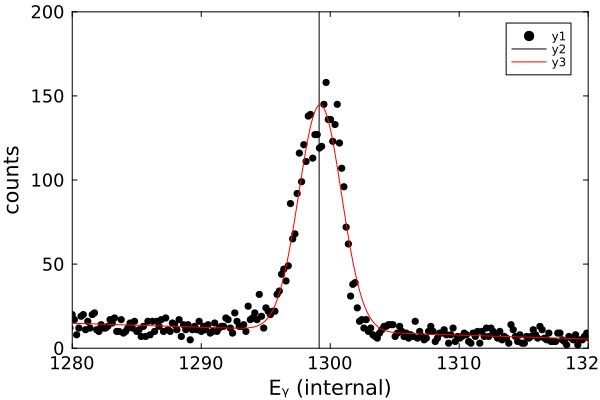

In [222]:
c0c2_p13_mean = sort(euliterature)[13]
c0c2_x13low,c0c2_x13high=1280,1320; ylow,yhigh=0,200

c0c2_param13=[0.1,0.000005,1000,c0c2_p13_mean,0.1]

c0c2_p13,c0c2_s13,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x13low,c0c2_x13high,c0c2_param13)

for (i,val) in enumerate(c0c2_p13)
    println("P$i = ",val,"($(c0c2_s13[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x13low,c0c2_x13high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p13),c0c2_x13low,c0c2_x13high,lc=:red)

#### Peak 14 (1408)

P1 = 225.54464866329627(146.68148293339564)
P2 = -0.1546016752233495(0.10400959335683184)
P3 = 3862.901301232188(18.974291769490485)
P4 = 1408.8707614186824(0.005392789479300988)
P5 = 1.023202052395614(0.005530466648555066)


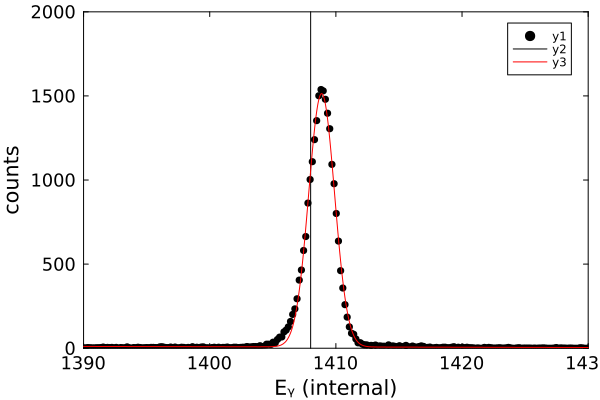

In [226]:
c0c2_p14_mean = sort(euliterature)[14]
c0c2_x14low,c0c2_x14high=1390,1430; ylow,yhigh=0,2000

c0c2_param14=[0.1,0.000005,1000,c0c2_p14_mean,0.1]

c0c2_p14,c0c2_s14,f=PhotopeakFit.gaussianfit(euc0c2cal,c0c2_x14low,c0c2_x14high,c0c2_param14)

for (i,val) in enumerate(c0c2_p14)
    println("P$i = ",val,"($(c0c2_s14[i]))")
end

scatter(euc0c2cal[:,1],euc0c2cal[:,2],xlims=(c0c2_x14low,c0c2_x14high),seriestype=:stepmid,ylims=(ylow,yhigh))
vline!(euliterature,lc=:black)
plot!(e->f(e,c0c2_p14),c0c2_x14low,c0c2_x14high,lc=:red)

## Residuals

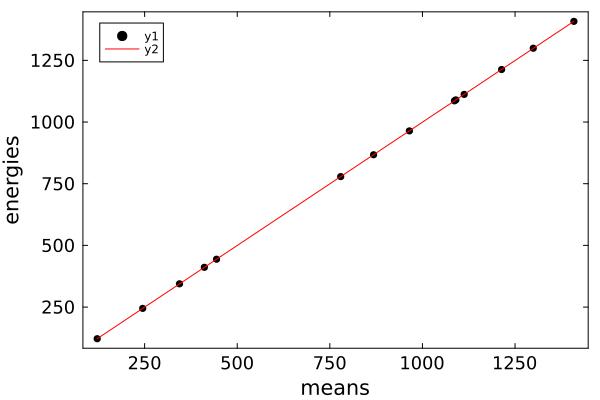

In [230]:
energies = sort(euliterature)

c0c2_means=[c0c2_p1[4],c0c2_p2[4],c0c2_p3[4],c0c2_p4[4],c0c2_p5[4],c0c2_p6[4],c0c2_p7[4],
            c0c2_p8[4],c0c2_p9[4],c0c2_p10[4],c0c2_p11[4],c0c2_p12[4],c0c2_p13[4],c0c2_p14[4]]

scatter(c0c2_means,energies,xlabel="means",ylabel="energies")

@. linearfit(e,p)=p[1]+p[2]*e

fitcrystal2=curve_fit(linearfit,c0c2_means,energies,[500,0.15])

scatter(c0c2_means,energies,xlabel="means",ylabel="energies")
plot!(e->linearfit(e,fitcrystal2.param),lc=:red)

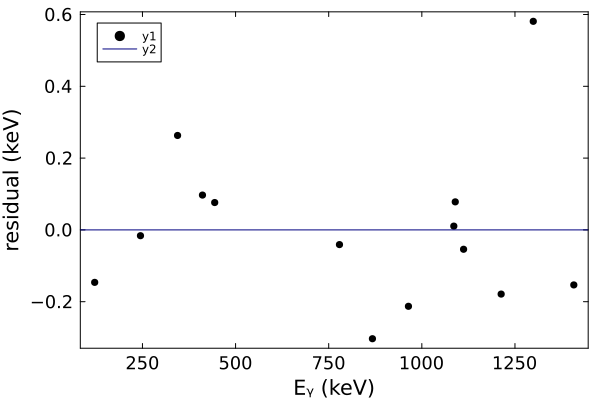

In [231]:
c0c2_residuals = energies .- ( fitcrystal2.param[1] .+ c0c2_means .* fitcrystal2.param[2] )

scatter(energies,c0c2_residuals,xlabel="Eᵧ (keV)",ylabel="residual (keV)")
hline!([0])